# Explore the given dataset using pandas and numpy libraries , try out different functions from pandas, also deal with the missing values and categorical variables.

In [1]:
# Importing the required librries

import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
# Reading the data

titanic = pd.read_csv(r"C:\Users\User\Downloads\titanic_data.csv - titanic_data.csv.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Number of Passengers travelling in Titanic ship was :"+ str(len(titanic)))

Number of Passengers travelling in Titanic ship was :891


In [4]:
titanic.shape

(891, 12)

In [5]:
# Checking for null values

total = titanic.isnull().sum().sort_values(ascending=False)
total
percent = ((titanic.isnull().sum())/(titanic.isnull().count())*100).sort_values(ascending=False)
percent
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [6]:
# Dropping the column Cabin

titanic.drop('Cabin', axis=1, inplace = True)

In [7]:
# For information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
# For statistics use
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [10]:
# Checking for value counts of Embarked column
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Categories of class
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [12]:
# Checking whose SibSp is equal to 8 
titanic.loc[titanic.SibSp == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


In [13]:
# Name of the person in 451th row
titanic.iloc[451, 3]

'Hagland, Mr. Ingvald Olai Olsen'

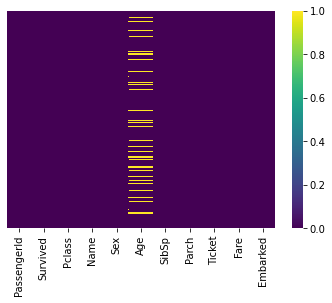

In [14]:
# Showing null values
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

In [15]:
titanic["Age"].fillna( method ='ffill', inplace=True)

In [16]:
titanic.Age.isnull().sum()

0

In [17]:
titanic["Embarked"].fillna( method ='ffill', inplace=True)

In [18]:
titanic.Embarked.isnull().sum()

0

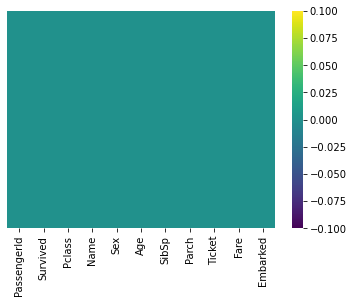

In [19]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

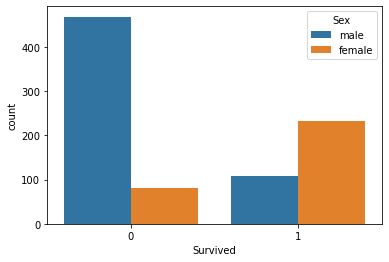

In [20]:
# Survived people
sns.countplot(x='Survived', hue='Sex', data=titanic)

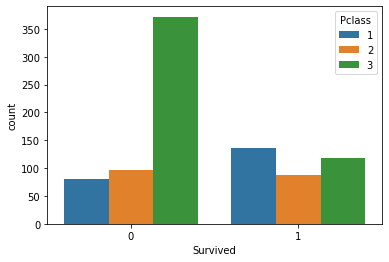

In [21]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

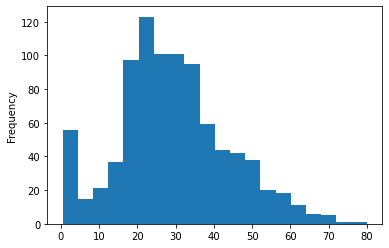

In [22]:
titanic.Age.plot.hist(bins=20)

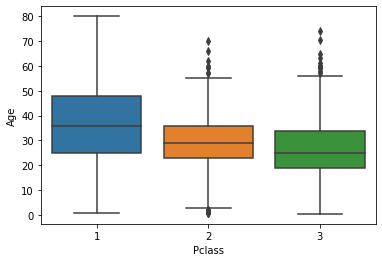

In [23]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [24]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [25]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
sex = pd.get_dummies(titanic['Sex'], columns = ['female', 'male'], drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
titanic.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
Pcl = pd.get_dummies(titanic['Pclass'], drop_first = True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
titanic =pd.concat([titanic, sex, embark, Pcl], axis =1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
# Copying to df so that if any problems occur in df, we can use titanic
df = titanic.copy()

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S,0,0,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [33]:
df.drop(['PassengerId', 'Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [34]:
titanic.Age.apply(np.cumsum).sort_values(ascending=False).head()

630    [80.0]
851    [74.0]
493    [71.0]
96     [71.0]
116    [70.5]
Name: Age, dtype: object

In [35]:
titanic.groupby('Age').sum()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,2,3
Age,,,,,,,,,,,
0.42,804,1,3,0,1,8.5167,1,0,0,0,1
0.67,756,1,2,1,1,14.5000,1,0,1,1,0
0.75,1586,2,9,4,2,45.7666,1,0,1,0,3
0.83,1744,2,7,1,3,54.9792,3,0,2,2,1
0.92,613,2,2,1,2,262.4333,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70.00,1419,0,3,1,1,81.5000,2,0,2,1,0
70.50,117,0,3,0,0,7.7500,1,1,0,0,1
71.00,591,0,2,0,0,84.1584,2,0,0,0,0


In [36]:
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [37]:
df.stack()

0    Survived                          0
     Name        Braund, Mr. Owen Harris
     Age                              22
     SibSp                             1
     Parch                             0
                          ...           
890  male                              1
     Q                                 1
     S                                 0
     2                                 0
     3                                 1
Length: 10692, dtype: object

In [38]:
print("The maximum age of all is :", df.Age.max())

The maximum age of all is : 80.0


In [39]:
print('The average age of all people are :', df.Age.mean())

The average age of all people are : 29.581560044893376


In [40]:
print("The maximum occuring age is :",df.Age.mode())

The maximum occuring age is : 0    24.0
dtype: float64


In [41]:
df.Age.apply(np.mean).head(3)

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [42]:
df.Age.where (df.Age <24).head()

0    22.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: Age, dtype: float64

In [43]:
df.drop_duplicates()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1,1,0
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.4500,0,0,1,0,1
889,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,0,0


In [44]:
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S,0,0,1,0,1


In [45]:
# Slicing
df[1:5]

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [46]:
price = df.Fare.value_counts().head(10)
price

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
Name: Fare, dtype: int64

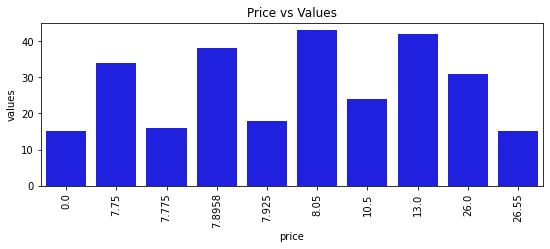

In [47]:
fig = plt.figure(figsize = (9,3))
sns.barplot(price.index, price.values, color='b')
plt.xlabel('price')
plt.ylabel('values')
plt.xticks(rotation = 'vertical')
plt.title('Price vs Values')
plt.show()

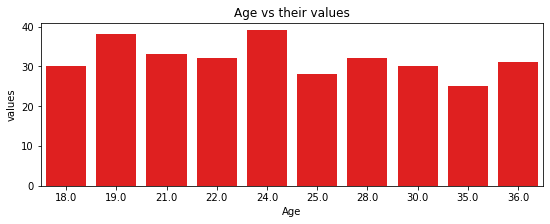

In [48]:
age = df.Age.value_counts().head(10)
age.head()
fig = plt.figure(figsize=(9,3))
sns.barplot(age.index, age.values, color='r')
plt.xlabel('Age')
plt.ylabel('values')
plt.title('Age vs their values')
plt.show()

In [49]:
print("The tickets of the first ten people are: \n", df.Ticket.head(10))

The tickets of the first ten people are: 
 0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object


In [50]:
# We will now use Plotly for visualisation

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)


In [51]:
trace = go.Pie(labels = list(price.index), values = list(price.values))
data = [trace]
fig = go.Figure(data = data)
py.iplot(fig)

In [52]:
# Donut Chart

data1 = {
   "values": list(price.index),
   "labels": list(price.values),
   "domain": {"column": 0},
   "name": "price",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data2 = {
   "values": list(age.index),
   "labels": list(age.values),
   "domain": {"column": 1},
   "name": "Age",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data = [data1,data2]
layout = go.Layout(
   {
      "title":"Price & Age",
      "grid": {"rows": 1, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "price",
            "x": 0.20,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "Age",
            "x": 0.8,
            "y": 0.5
         }
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [53]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [54]:
print('The top 5 names of the people who survived in Titanic accident :\n', df[df.Survived==1].Name.head(5))

The top 5 names of the people who survived in Titanic accident :
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object


In [55]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [56]:
parch = df.Parch.value_counts()
parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

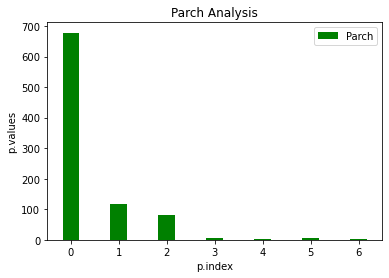

<Figure size 1080x288 with 0 Axes>

In [57]:
width=0.35
fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,4))

ax.bar(parch.index, parch.values, width, label='Parch', color='g')

ax.set_ylabel('p.values')
ax.set_xlabel('p.index')
ax.set_title('Parch Analysis')
ax.legend()

plt.show()

<ipython-input-58-1fa43b4a3959>:1: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



<StemContainer object of 3 artists>

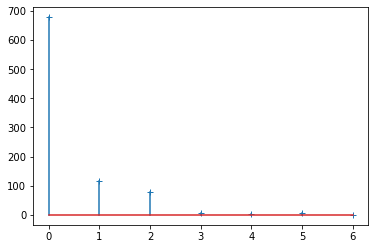

In [58]:
plt.stem(parch.index, parch.values, markerfmt='+')

(array([ 56.,  15.,  21.,  37.,  97., 123., 101., 101.,  95.,  59.,  44.,
         42.,  38.,  20.,  18.,  11.,   6.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

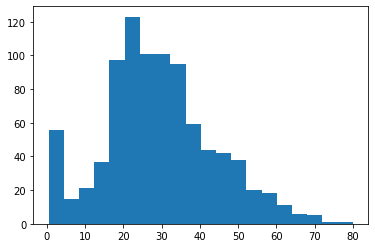

In [59]:
plt.hist(df.Age, bins=20)

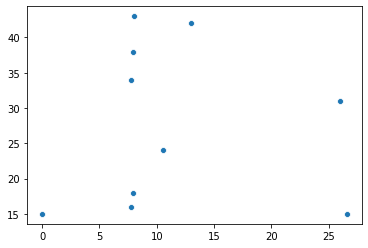

In [60]:
sns.scatterplot(price.index, price.values, data=df)

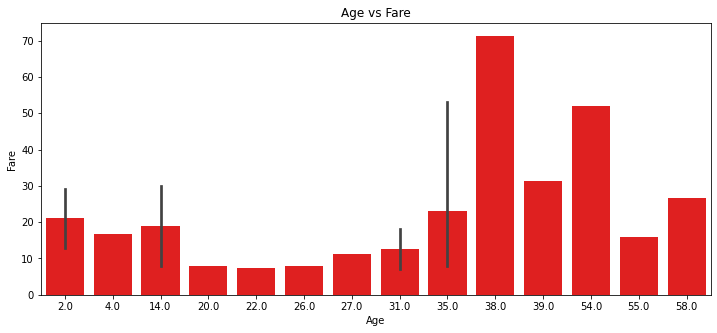

In [61]:
fig = plt.figure(figsize = (12,5))
sns.barplot(df.Age.head(20), df.Fare.head(20), color='r')
plt.title('Age vs Fare')
plt.show()

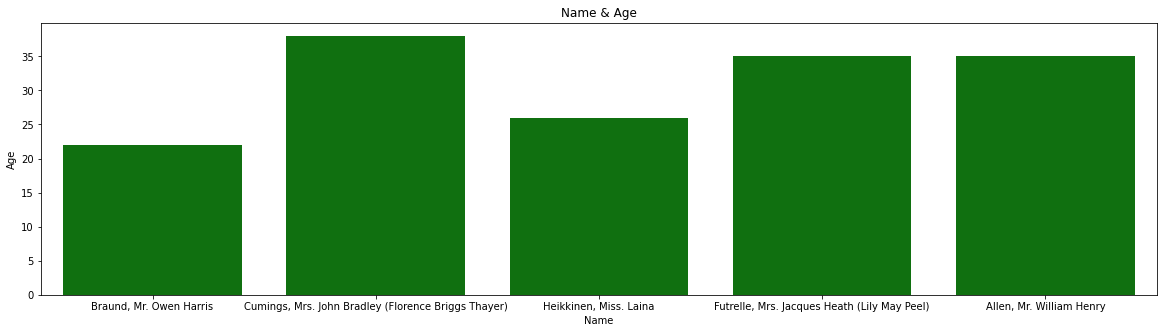

In [62]:
fig = plt.figure(figsize = (20,5))
sns.barplot(df.Name.head(5), df.Age.head(20), color='g')
plt.title('Name & Age')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

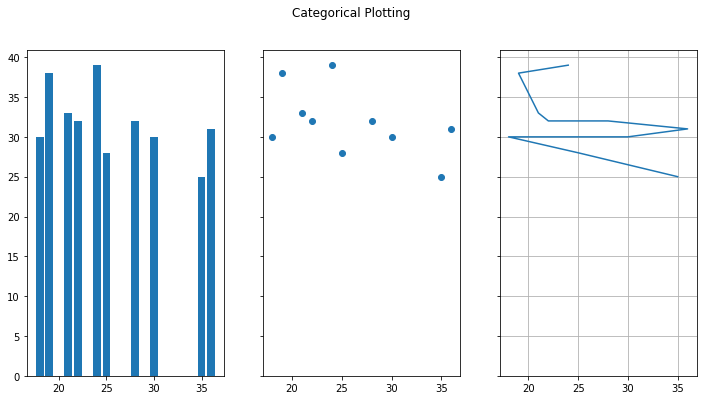

In [63]:

fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
axs[0].bar(age.index, age.values)
axs[1].scatter(age.index, age.values)
axs[2].plot(age.index, age.values)
plt.grid()
fig.suptitle('Categorical Plotting')


No handles with labels found to put in legend.


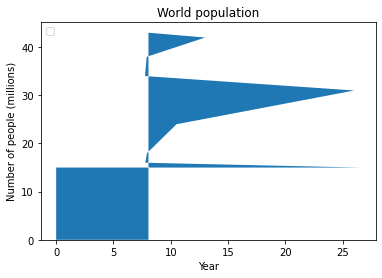

In [64]:

fig, ax = plt.subplots()
ax.stackplot(price.index, price.values)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()


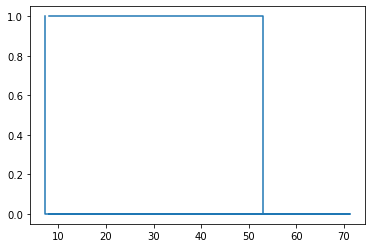

In [65]:
plt.step(df.Fare.head(), df.male.head())

{'whiskers': [<matplotlib.lines.Line2D at 0xda3a1c0>,
 'caps': [<matplotlib.lines.Line2D at 0xda3a880>,
 'boxes': [<matplotlib.lines.Line2D at 0x593be20>],
 'medians': [<matplotlib.lines.Line2D at 0xda3af40>],
 'fliers': [<matplotlib.lines.Line2D at 0xda42280>],
 'means': []}

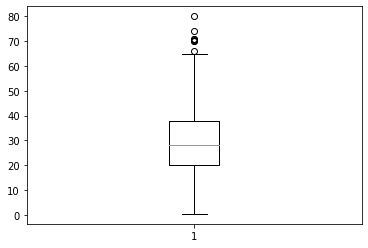

In [66]:
fig, ax= plt.subplots()
ax.boxplot(df.Age, vert=True)

In [67]:
# Use of some important functions

In [68]:
df.memory_usage(deep=True)

Index         128
Survived     7128
Name        75151
Age          7128
SibSp        7128
Parch        7128
Ticket      56802
Fare         7128
male          891
Q             891
S             891
2             891
3             891
dtype: int64

In [69]:
df.agg('Age').head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [70]:
df.agg('mean', axis='columns')

Series([], dtype: float64)

In [71]:
df.groupby('Age').sum().head()

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
Age,,,,,,,,,
0.42,1,0,1,8.5167,1,0,0,0,1
0.67,1,1,1,14.5000,1,0,1,1,0
0.75,2,4,2,45.7666,1,0,1,0,3
0.83,2,1,3,54.9792,3,0,2,2,1
0.92,2,1,2,262.4333,1,0,1,0,0


In [72]:
df.rolling(2).sum().head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,60.0,2.0,0.0,78.5333,1.0,0.0,1.0,0.0,1.0
2,2.0,64.0,1.0,0.0,79.2083,0.0,0.0,1.0,0.0,1.0
3,2.0,61.0,1.0,0.0,61.0250,0.0,0.0,2.0,0.0,1.0
4,1.0,70.0,1.0,0.0,61.1500,1.0,0.0,2.0,0.0,1.0


In [73]:
df.expanding().sum().head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1.0,60.0,2.0,0.0,78.5333,1.0,0.0,1.0,0.0,1.0
2,2.0,86.0,2.0,0.0,86.4583,1.0,0.0,2.0,0.0,2.0
3,3.0,121.0,3.0,0.0,139.5583,1.0,0.0,3.0,0.0,2.0
4,3.0,156.0,3.0,0.0,147.6083,2.0,0.0,4.0,0.0,3.0


In [74]:
df.ewm(com=0.5).mean().head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.000000,22.000000,1.000000,0.0,7.250000,1.000000,0.0,1.000000,0.0,1.000000
1,0.750000,34.000000,1.000000,0.0,55.274975,0.250000,0.0,0.250000,0.0,0.250000
2,0.923077,28.461538,0.307692,0.0,22.494223,0.076923,0.0,0.769231,0.0,0.769231
3,0.975000,32.875000,0.775000,0.0,43.153123,0.025000,0.0,0.925000,0.0,0.250000
4,0.322314,34.297521,0.256198,0.0,19.654338,0.677686,0.0,0.975207,0.0,0.752066


In [75]:
df.corr().head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.065571,-0.035322,0.081629,0.257307,-0.543351,0.008660,-0.155660,0.093349,-0.322308
Age,-0.065571,1.000000,-0.206104,-0.165191,0.083417,0.058415,0.027201,-0.030168,0.000919,-0.244945
SibSp,-0.035322,-0.206104,1.000000,0.414838,0.159651,-0.114631,-0.028085,0.070941,-0.055932,0.092548
Parch,0.081629,-0.165191,0.414838,1.000000,0.216225,-0.245489,-0.082636,0.063036,-0.000734,0.015790
Fare,0.257307,0.083417,0.159651,0.216225,1.000000,-0.182333,-0.112712,-0.166603,-0.118557,-0.413333


In [76]:
df.quantile(0.1).head()

Survived     0.00
Age         11.00
SibSp        0.00
Parch        0.00
Fare         7.55
Name: 0.1, dtype: float64

In [77]:
df.filter(['Age','Name'])

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
886,27.0,"Montvila, Rev. Juozas"
887,19.0,"Graham, Miss. Margaret Edith"
888,19.0,"Johnston, Miss. Catherine Helen ""Carrie"""
889,26.0,"Behr, Mr. Karl Howell"


In [78]:
df.Age.sample(n=3)

474    22.0
864    24.0
52     49.0
Name: Age, dtype: float64

In [79]:
df.truncate(before=2, after=4)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.100,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.050,1,0,1,0,1


In [80]:
df.interpolate(method='linear', axis=0).head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


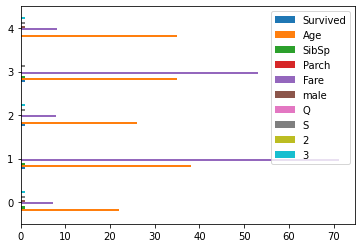

In [81]:
df.head().plot.barh()

In [82]:
df.squeeze('columns').head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [83]:
df.Age.div(2).head()

0    11.0
1    19.0
2    13.0
3    17.5
4    17.5
Name: Age, dtype: float64

In [84]:
df.pop('Name')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [85]:
df.isin([1,3])

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,False,False,True,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,True
3,True,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False,True,True,False
887,True,False,False,False,False,False,False,False,True,False,False
888,False,False,True,False,False,False,False,False,True,False,True
889,True,False,False,False,False,False,True,False,False,False,False


In [86]:
df.Age.apply(np.sqrt).head()

0    4.690416
1    6.164414
2    5.099020
3    5.916080
4    5.916080
Name: Age, dtype: float64

In [87]:
df.Age.transform(lambda x:x+1).head()

0    23.0
1    39.0
2    27.0
3    36.0
4    36.0
Name: Age, dtype: float64

In [88]:
df.unstack()

Survived  0      0
          1      1
          2      1
          3      1
          4      0
                ..
3         886    0
          887    0
          888    1
          889    0
          890    1
Length: 9801, dtype: object

In [89]:
df.xs(22.0)

Survived         1
Age             15
SibSp            0
Parch            0
Ticket      330923
Fare        8.0292
male             0
Q                1
S                0
2                0
3                1
Name: 22, dtype: object

In [90]:
df.get('Name')

In [91]:
df.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1


In [92]:
print('The round of Survived values are:\n', np.round(df.Survived))

The round of Survived values are:
 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [93]:
np.cumprod(df.Age)

0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           inf
889           inf
890           inf
Name: Age, Length: 891, dtype: float64

In [94]:
np.cbrt(df.Age).head()

0    2.802039
1    3.361975
2    2.962496
3    3.271066
4    3.271066
Name: Age, dtype: float64

In [95]:
np.absolute(df.Age).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [96]:
# How to highlight DataFrame
df.style.background_gradient(cmap='Reds')

In [97]:
df2=df.copy()

In [98]:
df

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,211536,13.0000,1,0,1,1,0
887,1,19.0,0,0,112053,30.0000,0,0,1,0,0
888,0,19.0,1,2,W./C. 6607,23.4500,0,0,1,0,1
889,1,26.0,0,0,111369,30.0000,1,0,0,0,0


In [99]:
df.iterrows()

<generator object DataFrame.iterrows at 0x00000000057AC970>